<a href="https://colab.research.google.com/github/lauramoraes/Analise_de_Clusters/blob/master/4-%20Redu%C3%A7%C3%A3o%20de%20dimensionalidade%20-%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização dos dados de alta dimensão

### Importando bibliotecas a serem usadas

In [0]:
suppressMessages(suppressWarnings(library(tidyverse)))
suppressMessages(suppressWarnings(library(ggplot2)))


### Carregando os dados salvos anteriormente

In [0]:
list.files()

[1] "data_cleaned.Rdata" "data_names.Rdata"   "data_onehot.Rdata" 
[4] "sample_data"

In [0]:
load("data_cleaned.Rdata")
load("data_onehot.Rdata")
head(data_onehot)

wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,⋯,DISTRICT.WEST,islay,midland,spey,east,west,north,lowland,campbell,islands
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0


### Visualizando em 2D

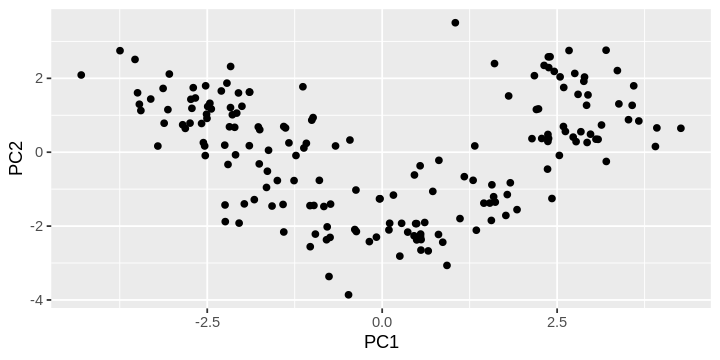

In [19]:
options(repr.plot.width=6, repr.plot.height=3)

pca <- prcomp(data_cleaned, scale=TRUE, center=TRUE)
pca_df <- data.frame(x=pca$x[,"PC1"], y=pca$x[,"PC2"])

# Plotando as direções de maior variância
ggplot(data = pca_df, aes(x,y)) + 
  geom_point() + xlab("PC1") + ylab("PC2")

### Adicionando um pouco mais de informação (cores!)
Vamos pintar com o tipo. Somente as 2 componentes principais já são quase suficientes para separarmos o dataset nos tipos previamente indicados.

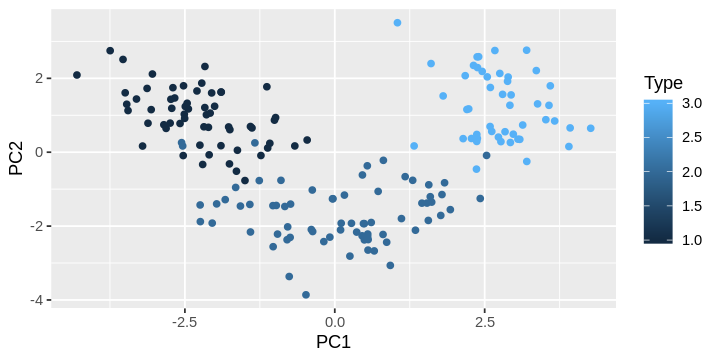

In [18]:
options(repr.plot.width=6, repr.plot.height=3)

pca <- prcomp(data_cleaned, scale=TRUE, center=TRUE)
pca_df <- data.frame(x=pca$x[,"PC1"], y=pca$x[,"PC2"], color=data_names)

# Plotando as direções de maior variância
ggplot(data = pca_df, aes(x,y, color=Type)) + 
  geom_point() + xlab("PC1") + ylab("PC2")

### Como vamos para um espaço reduzido que equilibre quantidade de informação e erro?
Podemos escolher ir para dimensões baixas (que vimos que nos ajuda a **visualizar**), mas, se o nosso dado tiver muitos atributos essas dimensões não são suficientes para conter **toda a informação** necessária para uma análise, deixando o **erro** em relação à informação original **muito grande**. Além disso, nem sempre precisamos visualizar o dado. Se quisermos utilizar essa informação para eliminar ruído e realizar um **agrupamento ou um sistema de recomendação**, podemos ainda trabalhar em dimensões altas (mas não tão altas quanto o original). Mas qual seria uma dimensão boa?

#### Variância explicada ou erro acumulado
Uma técnica utilizada é verificar o quanto que cada nova dimensão está contribuindo na explicação do dado (aumento da variância ou diminuição do erro). Em determinado momento, as novas dimensões contribuem tão pouco que podemos dispensá-las. Essa técnica é chamada de "cotovelo" ou "joelho", pois no ponto em que as dimensões passam a contribuir bem menos do que vinham contribuindo antes, a curva forma um joelho.

In [20]:
# Resultado do PCA
summary(pca)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

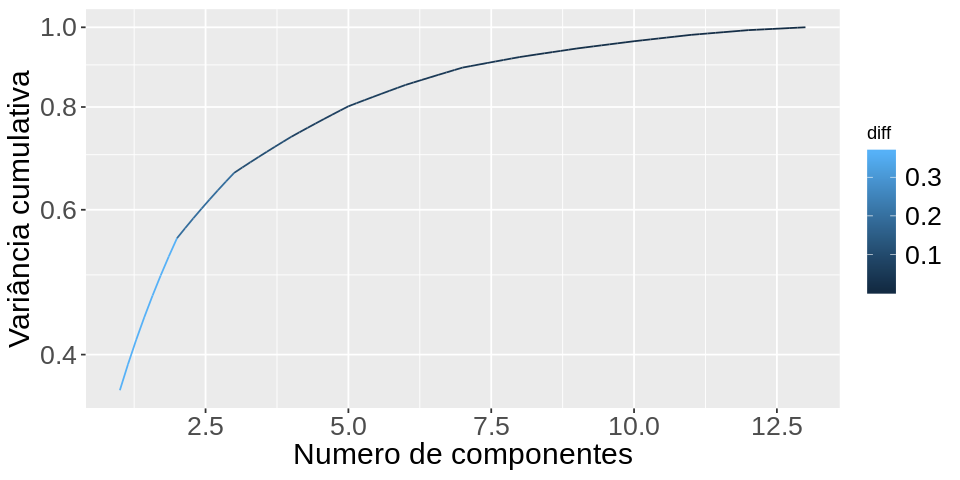

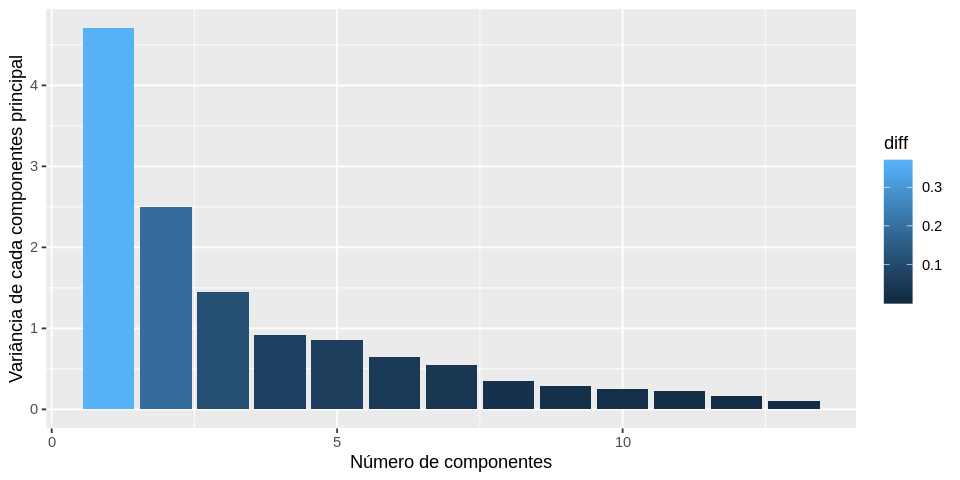

In [36]:
options(repr.plot.width=8, repr.plot.height=4)

variancia_explicada <- cumsum(pca$sdev^2 / sum(pca$sdev^2))
shifted <- c(0, variancia_explicada)
diff <- c(variancia_explicada, 1) - shifted
var_df <- data.frame(x=1:nrow(matrix(variancia_explicada)), 
                     y=variancia_explicada, 
                     y2=pca$sdev^2,
                     diff=matrix(diff)[-nrow(matrix(diff))])

# png(filename="variancia_cumulativa.png", width = 600, height = 300, res=72)
ggplot(data = var_df, aes(x,y, color=diff)) + 
  geom_line() + xlab("Numero de componentes") + ylab("Variância cumulativa") +
  theme(axis.title=element_text(size=18), axis.text=element_text(size=16),
       legend.text=element_text(size=16)) + coord_trans(y = "log10")
# dev.off()

# png(filename="variancia_cumulativa.png", width = 600, height = 300, res=72)
# ggplot(data = var_df, aes(x,y, color=diff, size=diff)) + 
#   geom_point() + xlab("Numero de componentes") + ylab("Variância cumulativa") +
#   theme(axis.title=element_text(size=18), axis.text=element_text(size=16),
#        legend.text=element_text(size=16))
# dev.off()

# png(filename="variancia_individual.png")
ggplot(data = var_df, aes(x,y2, fill=diff)) + 
  geom_bar(stat="identity") + xlab("Número de componentes") + ylab("Variância de cada componentes principal")
# dev.off()